In [20]:
import numpy as np
from base import base_utilities
from rw import lazy_handler

import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib  import cm

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Reader

I suggest you to learn how to use python dictionary and, most important, **python array** (numpy.ndarray).

The following functions will come at handy:

* np.where
* np.intersect1d
* np.unique
* np.append

As a general tip, do not use for loops in python for low level operation. Usually numpy has a faster and smarter function already build. Look for it! As always, stack overflow is your best friend

In [21]:
fname = '/home/matteo/Scrivania/neutrino_oscillation/testone.lazy'  #path for the .lazy(hdf5) file
reader = lazy_handler.LazyReader(fname)

In [22]:
#get the nuclide names in the file as a list
reader.get_nuclides_list()

['100Kr',
 '100Nb',
 '100Nb_1m',
 '100Rb',
 '100Sr',
 '100Tc',
 '100Y',
 '100Y_1m',
 '100Zr',
 '101Mo',
 '101Nb',
 '101Rb',
 '101Sr',
 '101Y',
 '101Zr',
 '102Nb',
 '102Nb_1m',
 '102Rb',
 '102Sr',
 '102Tc',
 '102Tc_1m',
 '102Y',
 '102Y_1m',
 '102Zr',
 '103Mo',
 '103Nb',
 '103Sr',
 '103Tc',
 '103Y',
 '103Zr',
 '104Mo',
 '104Nb',
 '104Nb_1m',
 '104Rh',
 '104Rh_1m',
 '104Sr',
 '104Tc',
 '104Y',
 '104Zr',
 '105Mo',
 '105Nb',
 '105Ru',
 '105Sr',
 '105Tc',
 '105Y',
 '105Zr',
 '106Mo',
 '106Nb',
 '106Rh',
 '106Rh_1m',
 '106Tc',
 '106Y',
 '106Zr',
 '107Mo',
 '107Nb',
 '107Ru',
 '107Tc',
 '107Y',
 '107Zr',
 '108Mo',
 '108Nb',
 '108Rh',
 '108Rh_1m',
 '108Tc',
 '108Y',
 '108Zr',
 '109Mo',
 '109Nb',
 '109Rh',
 '109Ru',
 '109Tc',
 '109Zr',
 '110Ag',
 '110Ag_1m',
 '110Mo',
 '110Nb',
 '110Rh',
 '110Ru',
 '110Tc',
 '110Zr',
 '111Mo',
 '111Nb',
 '111Pd',
 '111Pd_1m',
 '111Rh',
 '111Ru',
 '111Tc',
 '112Ag',
 '112Mo',
 '112Nb',
 '112Rh',
 '112Rh_1m',
 '112Ru',
 '112Tc',
 '113Ag',
 '113Ag_1m',
 '113Mo',
 '

In [23]:
# Get some info about the .lazy file as a python dictionary. 
##    please note: labels are the parameter name which all the nuclides should have!
reader.get_info()

{'E_step': 1.0,
 'date': '06/04/23',
 'labels': 'Q, unc_Q, z, n, symbol, half_life_sec, unc_hls, E_excited, unc_E_excited, half_life_sec, unc_hls, metastable, ripl_shift, Emax, fixed',
 'threshold_energy': 1806.0}

In [24]:
# Get all the data from a SINGLE nuclide as a python dictionary.
##     you can search for a particular nuclide by their position (loc) in the file or by its name.
nuclide_dic = reader.get_nuclide(loc=1)

print(nuclide_dic['lazy_name'])

#the following command does the same thing
nuclide_dic = reader.get_nuclide(name=nuclide_dic['lazy_name'])

100Nb


In [26]:
# Get a numpy array with the chosen parameter for all the nuclides in the file.
##     If a nuclide do not have the chosen parameter, then a value equal to 
##     "variable_not_found" will be assigned to it (default -2).
##         Please note that the indexes of the array are the same of the .lazy file structure.
##         i.e.: The "Q" in position 3 in the array correspond to the 3rd nuclide in the file
##         (reader.get_nuclide(loc=3))
Qs =reader.get_parameters(name='Q',variable_not_found=-1)

In [31]:
# Get a numpy array (matrix) with the spectrum of all the elements in the file.
##     E_min is the minimum energy [keV]
##     E_max is the maximum energy [keV]
spectrum, energy, posOK, posnotOK = reader.get_data(name='dN_dE_tot',E_min = 0, E_max = 15000)

In [34]:
print(spectrum.shape)  #spectrum is the array (matrix) with the neutrino spectra of the nuclides.
                       #to find the element which correspond to the i-th raw, find its location first
                       #(posOK[i]), then reader.get_nuclide(loc=posOK[i])

(461, 15000)


In [36]:
print(energy.shape)   #is the array with the energies of the spectrum in keV.

(15000,)

In [38]:
print(posOK.shape)    #is the array with the location in the file of the elements in spectrum. 

(461,)


In [40]:
print(posnotOK.shape) #is the array with the location in the file of the elements in the file which 
                      #DO NOT have the neutrino spectrum.

(276,)


# Writer

In [44]:
fname = '/home/matteo/Scrivania/neutrino_oscillation/testone.lazy'
writer = lazy_handler.LazyWriter(fname=fname)

In [47]:
# Write some info in the header of the file as a python dictionary. If a key of the dicitonary is already present in
# the file, it should overwrite it.
dic = {}
dic['puppa'] = 'oh,no!'
writer.set_general_info(dictionary=dic)

In [49]:
print(reader.get_info())

{'E_step': 1.0, 'date': '06/04/23', 'labels': 'Q, unc_Q, z, n, symbol, half_life_sec, unc_hls, E_excited, unc_E_excited, half_life_sec, unc_hls, metastable, ripl_shift, Emax, fixed', 'puppa': 'oh,no!', 'threshold_energy': 1806.0}


In [54]:
# Write some parameter(s) for the chosen nuclide.
# you can write it as a python dictionary or as a single variable.
# If a key of the dicitonary is already present in the file, it should overwrite it.

nuclide_name = '103Test'
dic = {}
dic['Tau'] = 12
dic['abundance'] = 15
writer.write_nuclide_data(nuclide_name=nuclide_name, dtype='info',dictionary=dic)

In [55]:
print(reader.get_nuclide(name='103Test'))

{'Tau': 12.0, 'abundance': 15.0, 'lazy_name': '103Test'}


In [57]:
# The following line overwrite the abundance value 
writer.write_nuclide_data(nuclide_name=nuclide_name, dtype='info',vname='abundance',vvalue=33)

In [58]:
print(reader.get_nuclide(name='103Test'))

{'Tau': 12.0, 'abundance': 33.0, 'lazy_name': '103Test'}


In [60]:
# Write some data for the chosen nuclide.
dummy_data = np.arange(500)
writer.write_nuclide_data(nuclide_name=nuclide_name,dtype='data',vname='spectrum',vvalue=dummy_data)

In [61]:
print(reader.get_nuclide(name='103Test'))

{'Tau': 12.0, 'abundance': 33.0, 'spectrum': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 17

# Examples!

In [69]:
# print the nuclides name with a Q value greater than 10000
Qs = reader.get_parameters('Q')
index = np.where(Qs>=10000)[0]

names = reader.get_nuclides_list()

for i in index:
    print(names[i])

100Kr
100Rb
101Rb
102Rb
102Y
102Y_1m
103Sr
104Sr
104Y
105Sr
105Y
106Y
107Y
108Nb
108Y
109Zr
110Nb
110Zr
111Nb
112Nb
112Tc
113Mo
113Nb
114Tc
115Mo
115Tc
116Tc
117Tc
118Rh
118Tc
119Ru
11Be
120Rh
122Rh
124Ag
124Ag_1m
126Ag
127Ag
128Ag
129Ag
12B
12Be
130Ag
130In
130In_1m
130In_2m
131Cd
132Cd
132In
133In
133In_1m
134In
135In
138Sb
139Sb
148Cs
150Cs
151Cs
154La
62Mn
62Mn_1m
63Cr
64Mn
65Cr
65Mn
66Mn
67Mn
68Co
68Co_1m
68Mn
69Fe
69Mn
70Co
70Co_1m
71Co
71Fe
72Co
72Fe
73Co
74Co
75Co
75Ni
76Cu
76Cu_1m
77Ni
78Cu
79Cu
80Cu
80Ga
81Zn
82Ga
82Zn
83Ga
83Zn
84As
84Ga
85Ga
85Ge
86As
86Ga
87As
87Ge
88As
88Ge
89As
89Ge
8He
8Li
90As
90Br
91As
91Se
92As
92Br
93Br
93Se
94Br
94Rb
94Se
95Br
96Br
96Rb
97Br
97Kr
97Rb
98Kr
98Rb
98Rb_1m
99Kr
99Rb
9Li


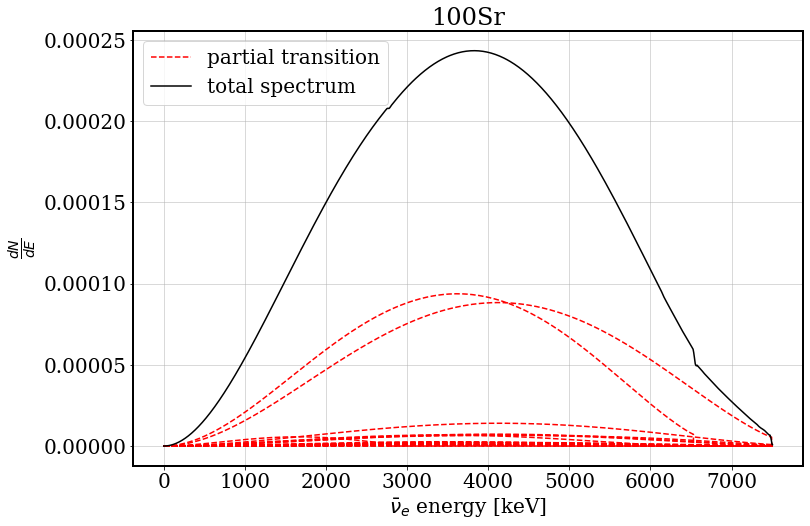

In [71]:
# plot the spectrum for the chosen nuclide
from scipy import integrate
nuclide_name = "100Sr"
###############################

nuclide =reader.get_nuclide(name=nuclide_name)

spectrum_total = nuclide["dN_dE_tot"]
energy = np.arange(0,len(spectrum_total),1.0)
norm = integrate.simps(spectrum_total,energy)
spectrum_total = spectrum_total/norm

spectrum_trans = nuclide["transition_dN_dE"]
energy2 = np.arange(0,spectrum_trans.shape[1],1.0)

for i in range(spectrum_trans.shape[0]):
    spectrum_trans[i,:] = spectrum_trans[i,:]/integrate.simps(spectrum_trans[i,:],energy2)

spectrum_calc = (spectrum_trans.T * nuclide["transition_intensity"]).T

spectrum_sum = np.sum(spectrum_calc,axis=0)
norm2 = integrate.simps(spectrum_sum,energy2)
spectrum_sum = spectrum_sum/norm2

plt.plot(energy2,spectrum_calc[0,:]/norm2,'--',color='r',label='partial transition')
for i in range(1,spectrum_trans.shape[0]):
    plt.plot(energy2,spectrum_calc[i,:]/norm2,'--',color='r')

plt.plot(energy,spectrum_total, c= 'k',label='total spectrum')

plt.xlabel(r"$\bar{\nu}_e$ energy [keV]")
plt.ylabel(r'$\frac{dN}{dE}$')
plt.legend()
plt.grid(True, which="both",alpha=0.6)
plt.title(nuclide["lazy_name"])
plt.show()

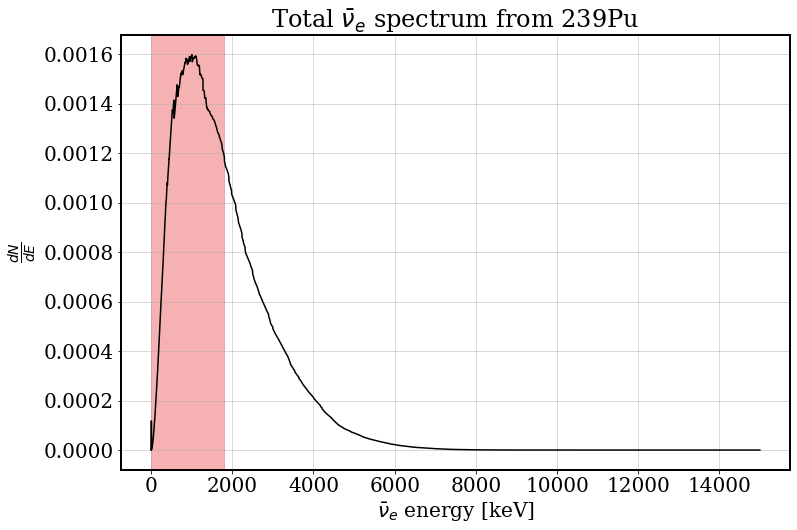

In [73]:
# plot the sum of the neutrino spectra from the 239 Pu

cfy = reader.get_parameters("cumulative_thermal_fy_239Pu",variable_not_found=0)
spectrum, energy, posOK, posnotOK = reader.get_data("dN_dE_tot",E_min = 0, E_max=15000)

for i in range(spectrum.shape[0]):
    spectrum[i,:] = spectrum[i,:]/integrate.simps(spectrum[i,:],energy)
    
spectrum_cfy = (spectrum.T * cfy[posOK]).T
plt.title(r'Total $\bar{\nu}_e$ spectrum from 239Pu')
plt.plot(energy,np.sum(spectrum_cfy,axis=0),c='k')

plt.axvspan(0,1806,alpha=0.6,color='lightcoral')
#plt.yscale('log')
plt.grid(True, which="both",alpha=0.6)
plt.xlabel(r"$\bar{\nu}_e$ energy [keV]")
plt.ylabel(r'$\frac{dN}{dE}$')

plt.show()

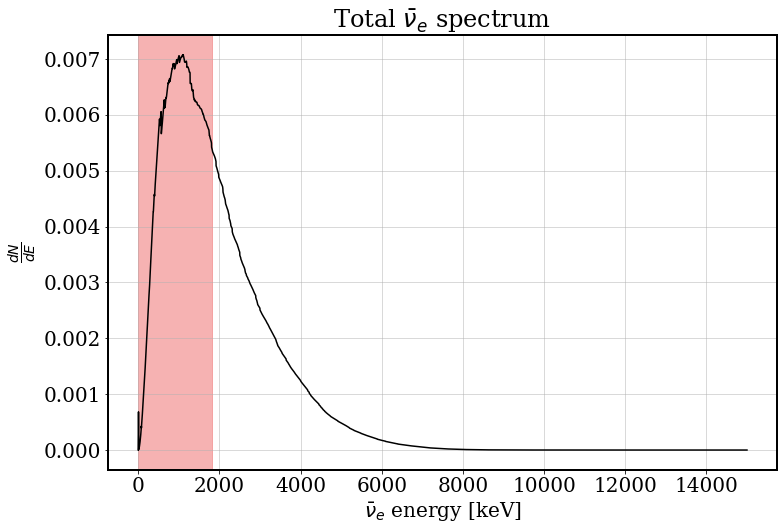

In [77]:
# Plot the total spectrum assuming fission fracions = 1
cfy_total = reader.get_parameters("cumulative_thermal_fy_239Pu",variable_not_found=0)
cfy_total += reader.get_parameters("cumulative_thermal_fy_235u",variable_not_found=0)
cfy_total += reader.get_parameters("cumulative_thermal_fy_241Pu",variable_not_found=0)
cfy_total += reader.get_parameters("cumulative_fast_fy_238u",variable_not_found=0)

spectrum, energy, posOK, posnotOK = reader.get_data("dN_dE_tot",E_min = 0, E_max=15000)

for i in range(spectrum.shape[0]):
    spectrum[i,:] = spectrum[i,:]/integrate.simps(spectrum[i,:],energy)
    
spectrum_cfy = (spectrum.T * cfy_total[posOK]).T

plt.title(r'Total $\bar{\nu}_e$ spectrum ')

plt.plot(energy,np.sum(spectrum_cfy,axis=0),c='k')

plt.axvspan(0,1806,alpha=0.6,color='lightcoral')
plt.grid(True, which="both",alpha=0.6)
plt.xlabel(r"$\bar{\nu}_e$ energy [keV]")
plt.ylabel(r'$\frac{dN}{dE}$')
plt.show()

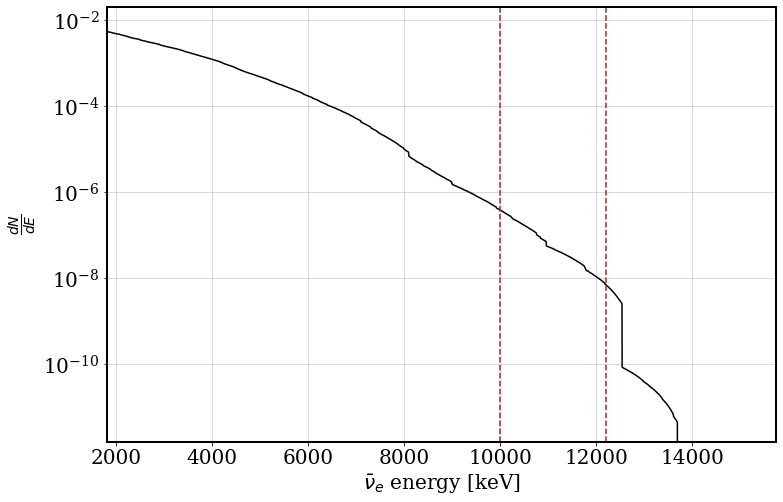

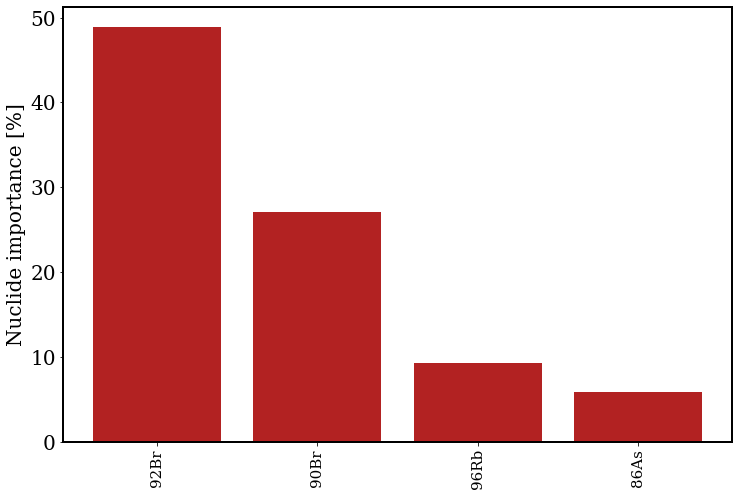

In [79]:
# Given an energy interval, find the most important nuclides

def find_max_per(array,value):
    dim = len(array)
    i = 1
    summ = 0
    while summ <= value:
        summ = np.sum(array[:i])
        i += 1
    return i

E_min = 10000
E_max = 12200

#################################################
plt.plot(energy,np.sum(spectrum_cfy,axis=0),c='k')

plt.xlim(1806)
plt.axvline(E_min,ls='--',color="firebrick")
plt.axvline(E_max,ls='--',color="firebrick")

plt.yscale('log')
plt.grid(True, which="both",alpha=0.6)
plt.xlabel(r"$\bar{\nu}_e$ energy [keV]")
plt.ylabel(r'$\frac{dN}{dE}$')
#plt.savefig("nu_spectra.jpeg")
plt.savefig("F1.png")
plt.show()


pmin, pmax =np.where((energy>=E_min)&(energy<=E_max))[0][[0,-1]]

temp = []
for i in range(spectrum_cfy.shape[0]):
    temp.append(integrate.simps(spectrum_cfy[i,pmin:pmax],energy[pmin:pmax]))
integrale = np.array(temp)
integrale = (integrale/np.sum(integrale))*100

index_ordered = np.argsort(integrale)[::-1]

integrale = integrale[index_ordered]
nuc_integrate = np.array(reader.get_nuclides_list())[posOK[index_ordered]]
pstop = find_max_per(integrale,80)

plt.bar(nuc_integrate[:pstop],integrale[:pstop],color='firebrick')
plt.xticks(fontsize=15, rotation=90)
plt.ylabel("Nuclide importance [%]")
plt.show()